# MAPEM de Pierro algorithm

In [1]:
#%% make sure figures appears inline and animations works
%matplotlib notebook

In [2]:
import sirf.STIR as pet
import matplotlib.pyplot as plt
import os
import numpy
from numpy.linalg import norm

# Get to correct directory
os.chdir("/Users/rich/Documents/Data/Johannes_data/SRS_data_exhale/")

## PET ground truth

<IPython.core.display.Javascript object>


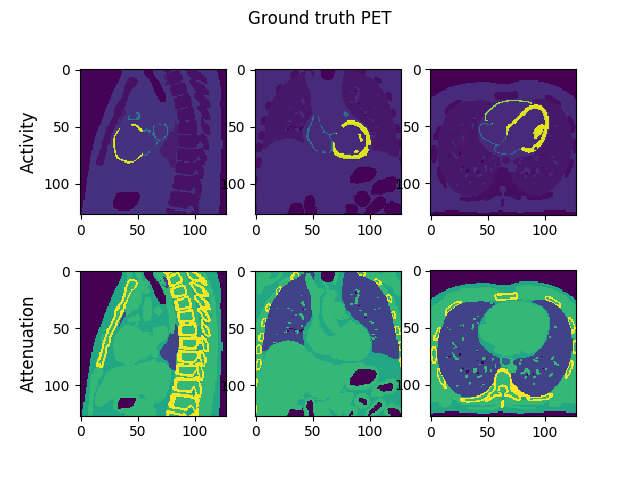

In [3]:
gt_act = pet.ImageData('PET_activity.nii')
gt_atten = pet.ImageData('PET_attenuation.nii')

fig, axs = plt.subplots(2,3)
fig.suptitle('Ground truth PET')

# PET Activity
axs[0,0].set_ylabel('Activity', rotation=90, size='large')
axs[0,0].imshow(gt_act.as_array()[:,:,60])
axs[0,1].imshow(gt_act.as_array()[:,60,:])
axs[0,2].imshow(gt_act.as_array()[60,:,:])

# PET attenuation
axs[1,0].set_ylabel('Attenuation', rotation=90, size='large')
axs[1,0].imshow(gt_atten.as_array()[:,:,60])
axs[1,1].imshow(gt_atten.as_array()[:,60,:])
axs[1,2].imshow(gt_atten.as_array()[60,:,:])

## MR ground truth

<IPython.core.display.Javascript object>


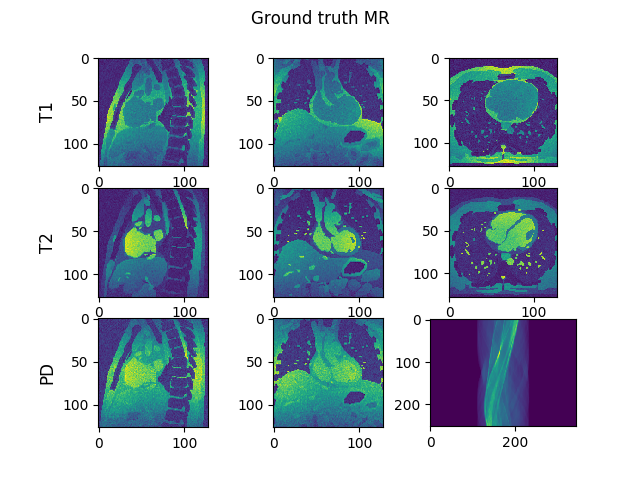

In [4]:
gt_T1 = pet.ImageData('MR_T1.nii')
gt_T2 = pet.ImageData('MR_T2.nii')
gt_PD = pet.ImageData('MR_PD.nii')

fig, axs = plt.subplots(3,3)
fig.suptitle('Ground truth MR')

# MR T1
axs[0,0].set_ylabel('T1', rotation=90, size='large')
axs[0,0].imshow(gt_T1.as_array()[:,:,60])
axs[0,1].imshow(gt_T1.as_array()[:,60,:])
axs[0,2].imshow(gt_T1.as_array()[60,:,:])

# MR T1
axs[1,0].set_ylabel('T2', rotation=90, size='large')
axs[1,0].imshow(gt_T2.as_array()[:,:,60])
axs[1,1].imshow(gt_T2.as_array()[:,60,:])
axs[1,2].imshow(gt_T2.as_array()[60,:,:])

# MR PD
axs[2,0].set_ylabel('PD', rotation=90, size='large')
axs[2,0].imshow(gt_PD.as_array()[:,:,60])
axs[2,1].imshow(gt_PD.as_array()[:,60,:])
axs[2,2].imshow(gt_PD.as_array()[60,:,:])

## Create noise

In [5]:
#%% create acquisition model
am = pet.AcquisitionModelUsingRayTracingMatrix()
# we will increate the number of rays used for every Line-of-Response (LOR) as an example
# (it is not required for the exercise of course)
am.set_num_tangential_LORs(5)

templ = pet.AcquisitionData('mMR_template_span11.hs')
am.set_up(templ,gt_act);


In [6]:
#%% simulate some data using forward projection
gt_sino = am.forward(gt_act)

In [7]:
plt.imshow(gt_sino.as_array()[0,400,:,:])

In [8]:
gt_sino_array = numpy.abs(gt_sino.as_array());
noisy_array = numpy.random.poisson(gt_sino_array).astype('float64');
noisy_sino = gt_sino.clone();
noisy_sino.fill(noisy_array);

<IPython.core.display.Javascript object>


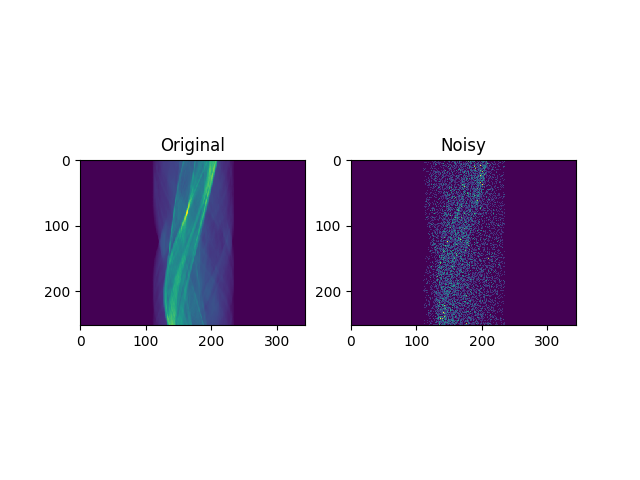

In [9]:
fig, axs = plt.subplots(1,2)

# Sinograms
axs[0].title.set_text('Original')
axs[0].imshow(gt_sino_array[0,400,:,:])
axs[1].title.set_text('Noisy')
axs[1].imshow(noisy_array[0,400,:,:])